The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.shape

(891, 12)

In [8]:
print("No.of rows in the dataset",df.shape[0])
print("No.of columns in the dataset",df.shape[1])

No.of rows in the dataset 891
No.of columns in the dataset 12


The Dataset Contains 891 rows and 12 columns where 11 are independent variables and 1 is target variable 

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

This dataset contains three types of data:float64,int64 and object

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.drop(columns = 'Cabin', axis = 1, inplace = True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Dropping Cabin column as it is having lot of Unique values

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [13]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

we have filled the null values for Age and Embarked Columns

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

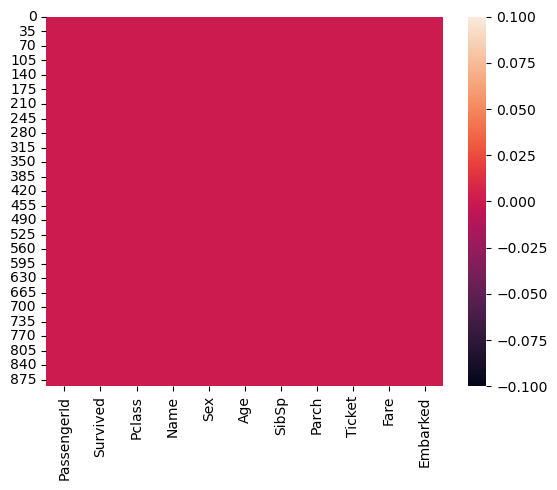

In [15]:
sns.heatmap(df.isnull())

From the above heatmap it is clear that there is no missing data present in our Dataset

In [16]:
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


Since the No.of Unique Values for target variable are 2 and the no of rows in the dataset are 891 which is huge gap so this problem can be considered as Classification problem

In [17]:
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

We have drop some columns as PassengerId and Name have same length of Unique values and they might not play any role in prediction of target so dropping them also dropping ticket number as it doesnot play any role in prediction of target

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [19]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


from the above we can observe:
1.Since count is same for all the columns so there are no missing values present in the dataset
2.Mean is greater than median(50%)for Survived,SibSp,Parch and Fare so data is skewed to right for these coulmns
3.mean is less than median(50%)for age so data is skewed to left for this column
4.Large difference in 75% and max value for age and Fare column so this shows the dataset has outliers and skewness present.

In [20]:
df.duplicated().sum()

111

In [21]:
df=df.drop_duplicates()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


Univarient Analysis

male      488
female    292
Name: Sex, dtype: int64


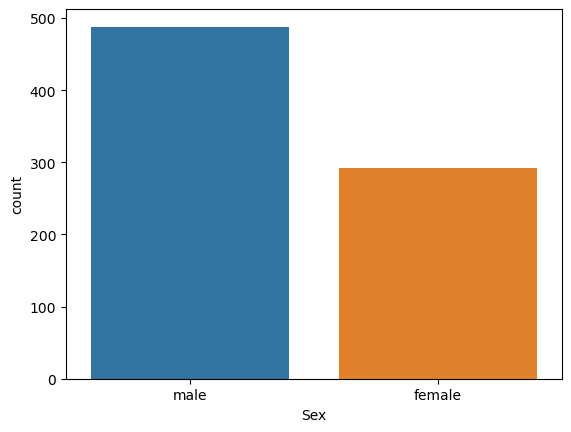

In [22]:
AX=sns.countplot(x=df['Sex'])
print(df["Sex"].value_counts())

This plot clearly shows male died more than females and females survived more than male

3    404
1    212
2    164
Name: Pclass, dtype: int64


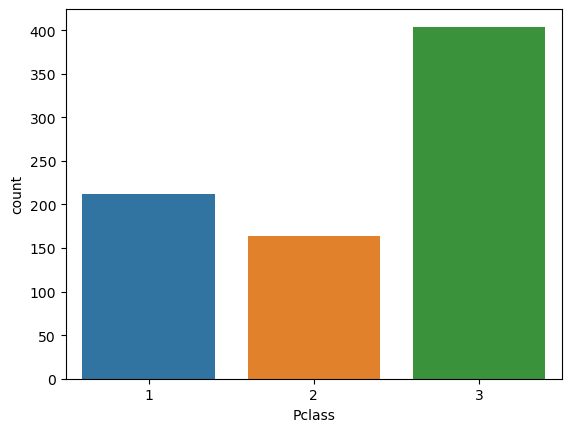

In [23]:
AX=sns.countplot(x=df['Pclass'])
print(df["Pclass"].value_counts())

It is clear from the plot that most people were from 3rd class

29.699118    104
24.000000     29
18.000000     25
22.000000     24
19.000000     23
            ... 
36.500000      1
0.920000       1
23.500000      1
55.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


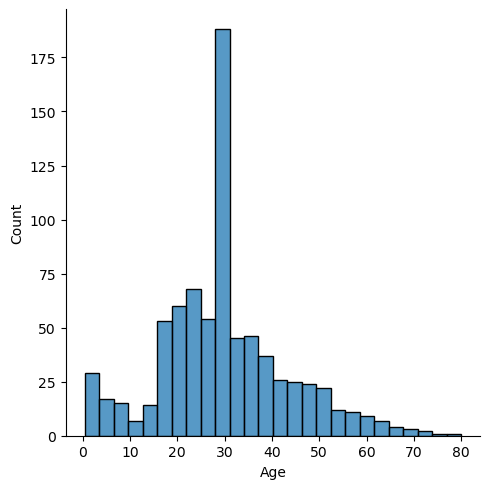

In [24]:
AX=sns.displot(x=df['Age'])
print(df['Age'].value_counts())

From this plot it came to know that most of the people are 20-40 age group.

0    513
1    201
2     27
4     18
3     14
5      5
8      2
Name: SibSp, dtype: int64


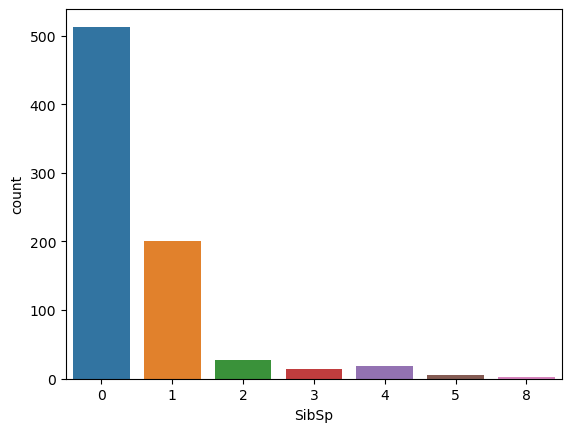

In [25]:
AX=sns.countplot(x=df['SibSp'])
print(df['SibSp'].value_counts())

It is clear from the plot that most people were travelling single and less with family as sibling count 0 is higher

13.0000    31
26.0000    30
8.0500     25
10.5000    23
7.8958     20
           ..
28.5000     1
6.2375      1
14.0000     1
9.4750      1
10.5167     1
Name: Fare, Length: 248, dtype: int64


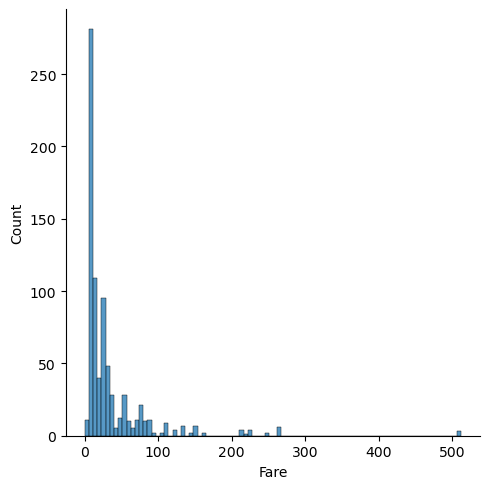

In [26]:
AX=sns.displot(x=df['Fare'])
print(df['Fare'].value_counts())

S    567
C    155
Q     58
Name: Embarked, dtype: int64


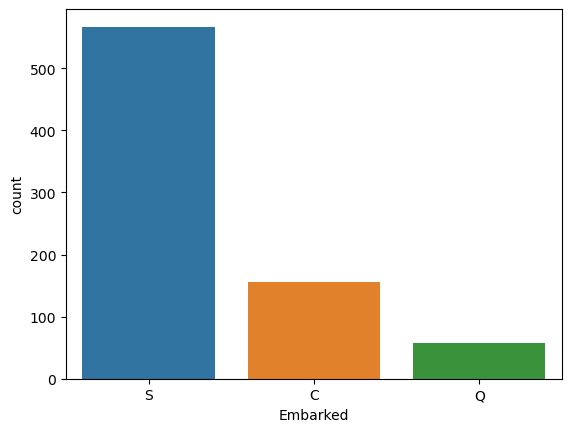

In [27]:
AX=sns.countplot(x=df['Embarked'])
print(df['Embarked'].value_counts())

It is clear from the plot that the most people were Embarked for S and less for C and Q

0    458
1    322
Name: Survived, dtype: int64


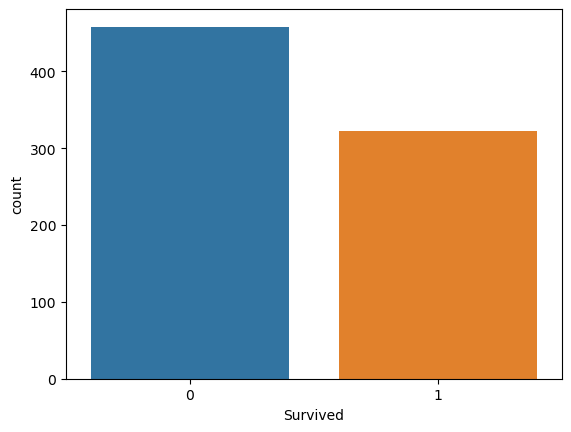

In [28]:
AX=sns.countplot(x=df['Survived'])
print(df['Survived'].value_counts())

From the above plot we can say that most people died and less Survived

Bivarient Analysis

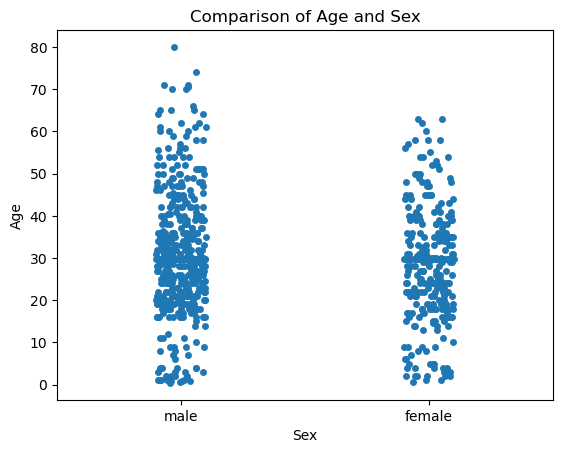

In [29]:
plt.title("Comparison of Age and Sex")
sns.stripplot(x="Sex",y="Age",data=df)
plt.show()

There is no sigificance among the features they both seems almost equal but there distribution shows irregularity

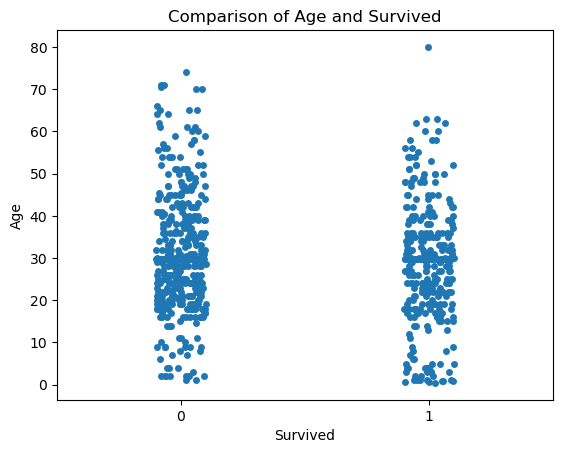

In [30]:
plt.title("Comparison of Age and Survived")
sns.stripplot(x="Survived",y="Age",data=df)
plt.show()

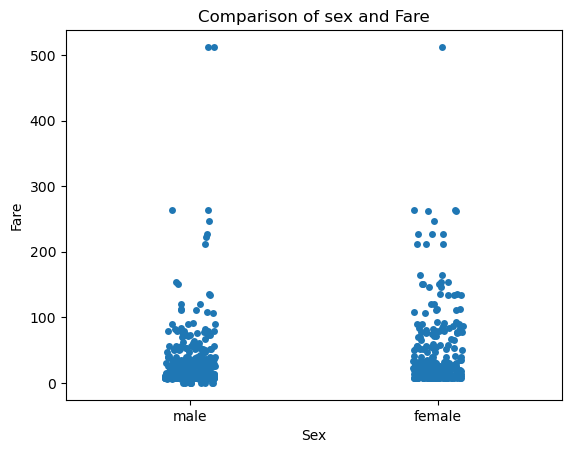

In [31]:
plt.title("Comparison of sex and Fare")
sns.stripplot(x="Sex",y="Fare",data=df)
plt.show()

Again we can say that there is no significance among the features they seem to be almost equally distributed but yet again the data is irregular

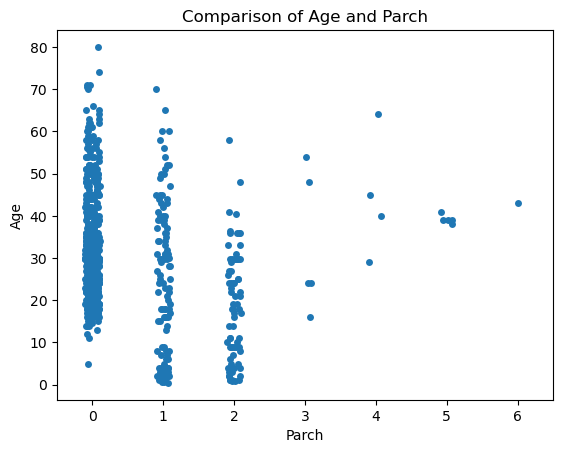

In [32]:
plt.title("Comparison of Age and Parch")
sns.stripplot(x="Parch",y="Age",data=df)
plt.show()

Here we can say that for Parch 0,1 and 2 data seems equal but it is not so for 3,4,5&6 also there are wide spaces showing irregularity

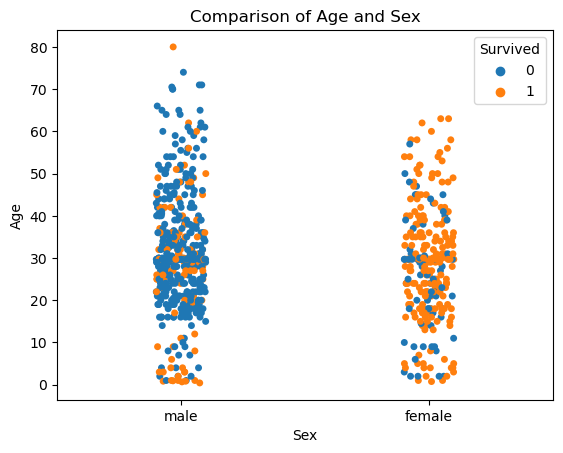

In [33]:
plt.title("Comparison of Age and Sex")
sns.stripplot(x="Sex",y="Age",data=df,hue="Survived")
plt.show()

Here it is clear from the plot that the people who survived were maximum of females but they are irregular with the age 

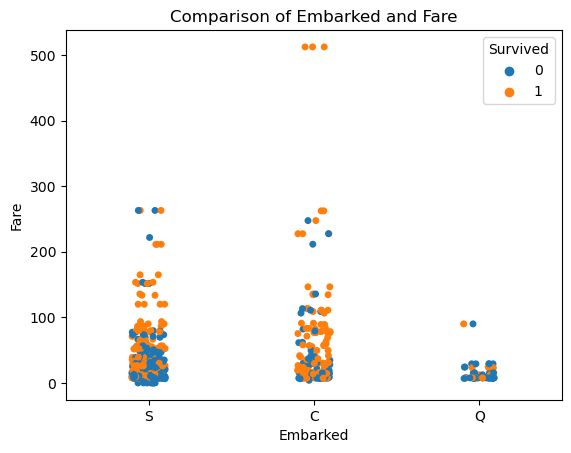

In [34]:
plt.title("Comparison of Embarked and Fare")
sns.stripplot(x="Embarked",y="Fare",data=df,hue="Survived")
plt.show()

Here it is clear that most people were Embarked with S&C and very less for Q

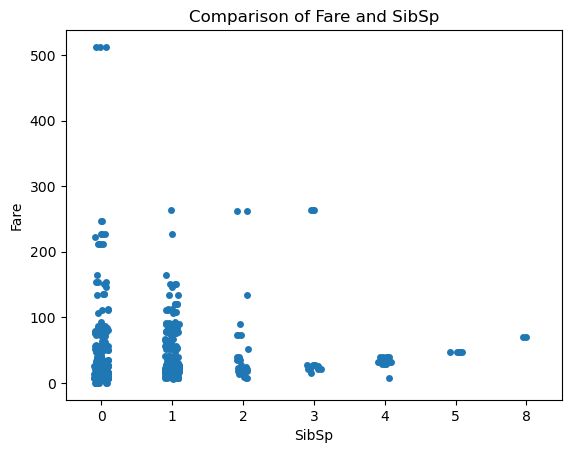

In [35]:
plt.title("Comparison of Fare and SibSp")
sns.stripplot(x="SibSp",y="Fare",data=df)
plt.show()

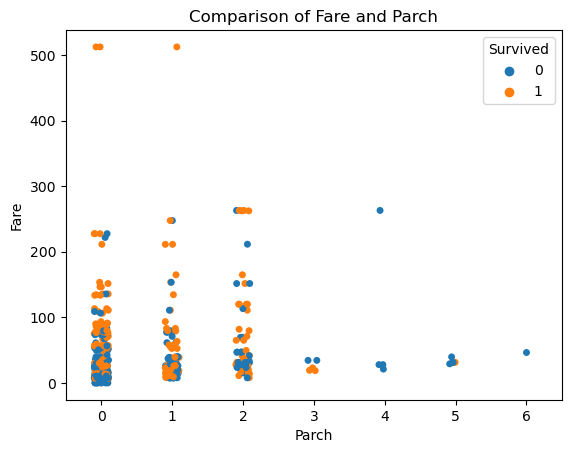

In [36]:
plt.title("Comparison of Fare and Parch")
sns.stripplot(x="Parch",y="Fare",data=df,hue="Survived")
plt.show()

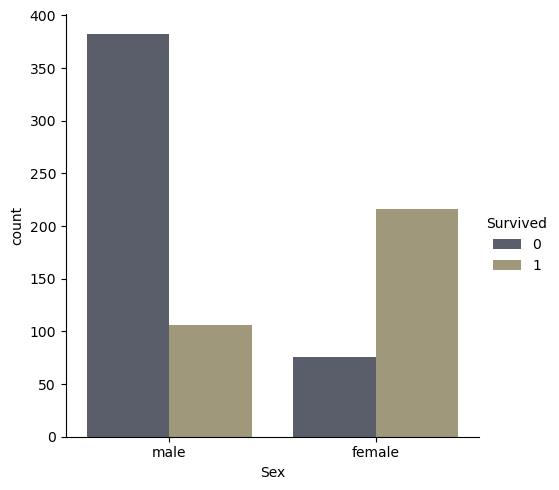

In [37]:
sns.catplot(x="Sex",hue="Survived",palette="cividis",kind="count",data=df)
plt.show()

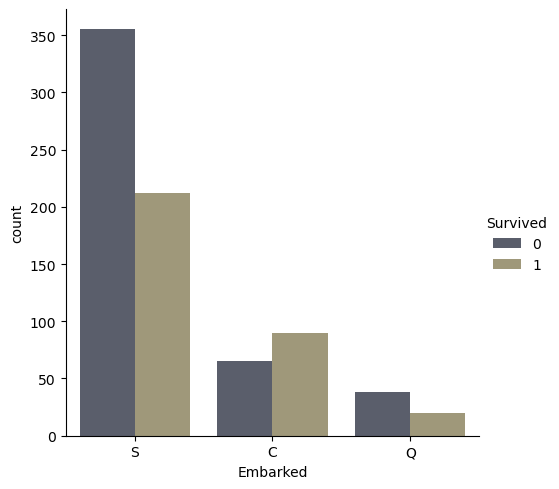

In [38]:
sns.catplot(x="Embarked",hue="Survived",palette="cividis",kind="count",data=df)
plt.show()

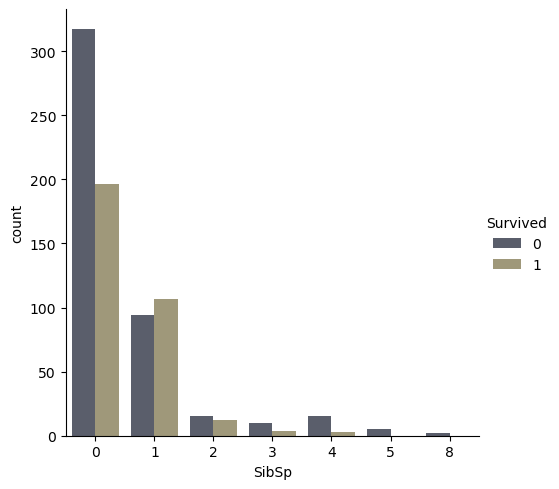

In [39]:
sns.catplot(x="SibSp",hue="Survived",palette="cividis",kind="count",data=df)
plt.show()

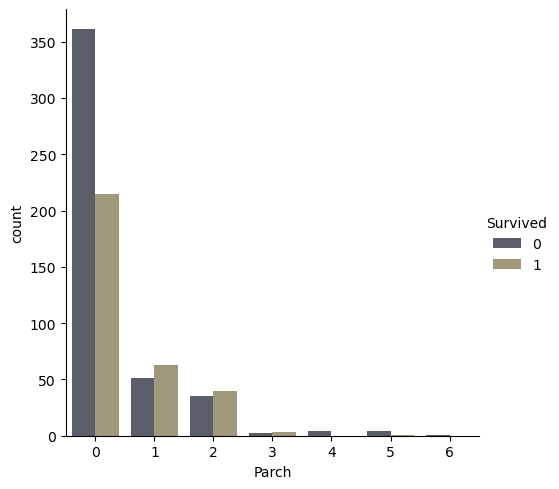

In [40]:
sns.catplot(x="Parch",hue="Survived",palette="cividis",kind="count",data=df)
plt.show()

Multivarient Analysis

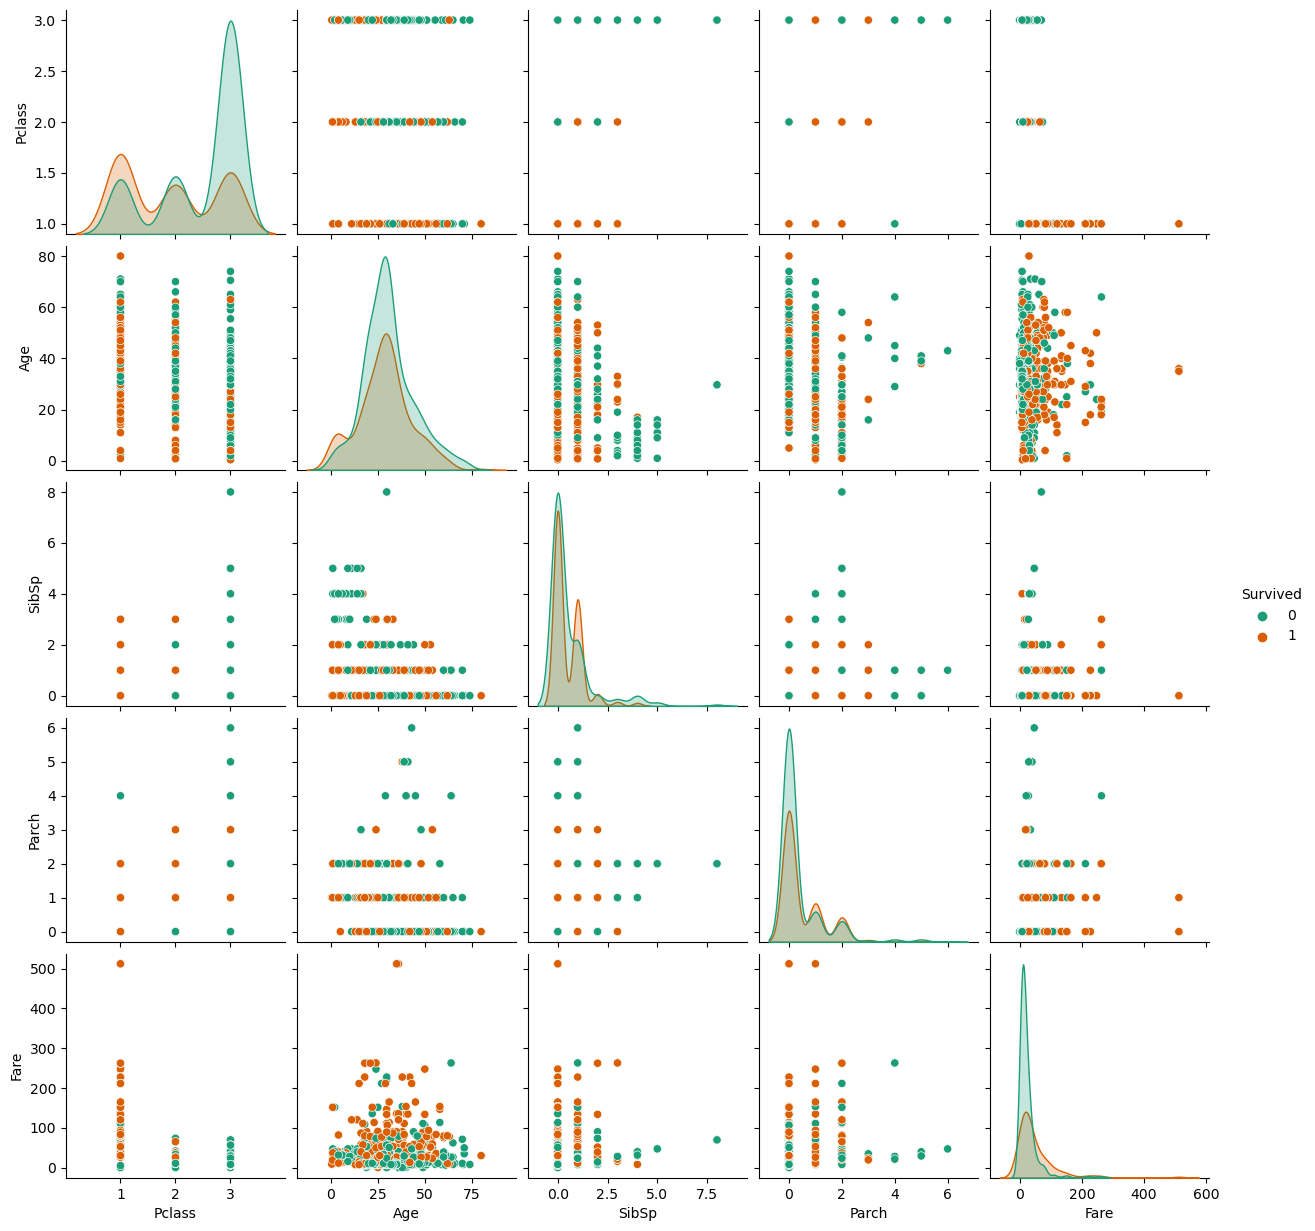

In [41]:
sns.pairplot(df,hue="Survived",palette="Dark2")
plt.show()

Splitting the Numerical and Categorical data

In [42]:
categorical_data=df.select_dtypes(include=np.object0)

In [43]:
numerical_data=df.select_dtypes(exclude=np.object0)

In [44]:
categorical_data.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [45]:
numerical_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


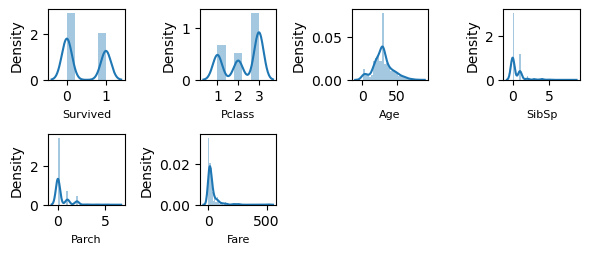

In [46]:
plt.figure(figsize = (6,6))
pltnumber = 1

for column in numerical_data:
    if pltnumber<=8:
        ax = plt.subplot(5,4,pltnumber)
        sns.distplot(numerical_data[column])
        plt.xlabel(column,fontsize=8)
        pltnumber+=1
plt.tight_layout()

In [47]:
categorical_data['Embarked']=categorical_data['Embarked'].replace({'S':0,'C':1,'Q':2})

In [48]:
categorical_data['Sex']=categorical_data['Sex'].map({'male':0,'female':1})

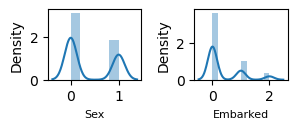

In [49]:
plt.figure(figsize = (6,6))
pltnumber = 1

for column in categorical_data:
    if pltnumber<=8:
        ax = plt.subplot(5,4,pltnumber)
        sns.distplot(categorical_data[column])
        plt.xlabel(column,fontsize=8)
        pltnumber+=1
plt.tight_layout()

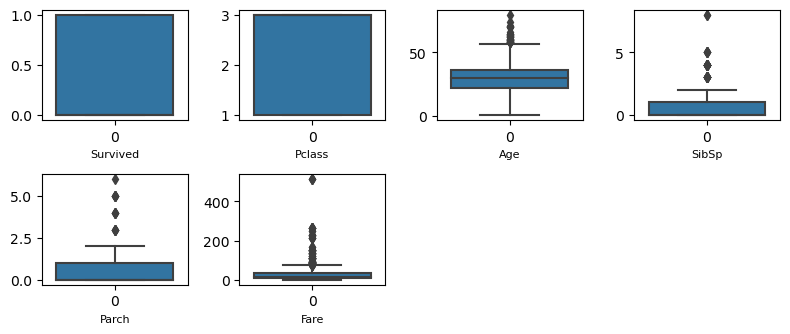

In [50]:
plt.figure(figsize = (8,8))
pltnumber = 1

for column in numerical_data:
    if pltnumber<=8:
        ax = plt.subplot(5,4,pltnumber)
        sns.boxplot(numerical_data[column])
        plt.xlabel(column,fontsize=8)
        pltnumber+=1
plt.tight_layout()

We can clearly see outliers in Age, SibSp,Parch and Fare so we remove them 

In [51]:
from scipy.stats import zscore

z = np.abs(zscore(numerical_data))
threshold = 3
df= numerical_data[(z<3).all(axis = 1)]
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
883,0,2,28.000000,0,0,10.5000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


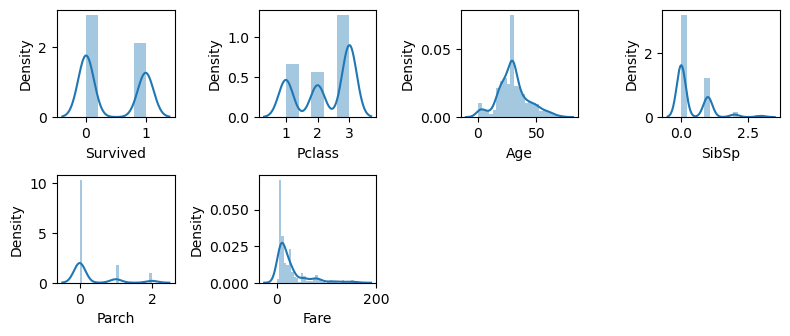

In [52]:
plt.figure(figsize = (8,8))
pltnumber = 1

for column in df:
    if pltnumber<=8:
        ax = plt.subplot(5,4,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

In [53]:
data_loss=(891-717)/891*100
data_loss

19.52861952861953

In [54]:
df.skew()

Survived    0.331488
Pclass     -0.493072
Age         0.347675
SibSp       1.807023
Parch       1.929734
Fare        2.142501
dtype: float64

In [56]:
from sklearn.preprocessing import power_transform
df= power_transform(df, method ='yeo-johnson')
df= pd.DataFrame(df,columns=numerical_data.columns)

In [151]:
df.skew()

Survived    0.331488
Pclass     -0.349868
Age         0.036325
SibSp       0.810564
Parch       1.402669
Fare       -0.019846
dtype: float64

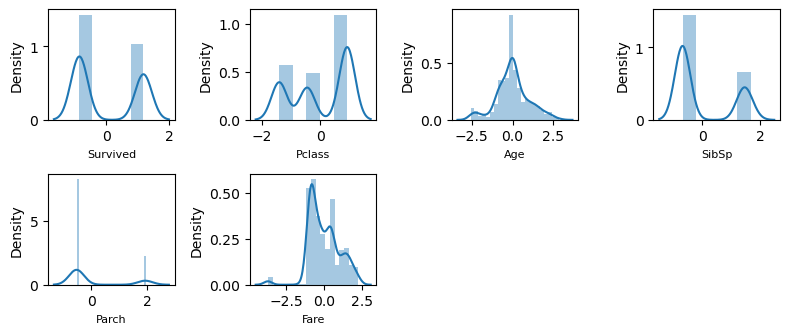

In [152]:
plt.figure(figsize = (8,8))
pltnumber = 1

for column in df:
    if pltnumber<=8:
        ax = plt.subplot(5,4,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=8)
        pltnumber+=1
plt.tight_layout()

In [153]:
numerical_data['Survived'].value_counts()

0    458
1    322
Name: Survived, dtype: int64

In [154]:
y=numerical_data['Survived']

In [155]:
corr = categorical_data.corr()
corr

,Sex,Embarked
Sex,1.000000,0.093164
Embarked,0.093164,1.000000


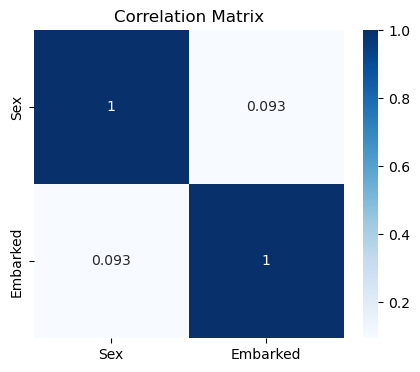

In [156]:
plt.figure(figsize= (5,4))
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.title("Correlation Matrix")
plt.show()

Since both the categorical data Sex and Embarked are not correlated with each other so there is no multicollinearity in the categorical data

In [157]:
corr1 = numerical_data.corr()
corr1

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.336244,-0.079192,-0.037597,0.069669,0.246669
Pclass,-0.336244,1.000000,-0.338528,0.086788,0.038975,-0.552440
Age,-0.079192,-0.338528,1.000000,-0.280010,-0.186999,0.090555
SibSp,-0.037597,0.086788,-0.280010,1.000000,0.380596,0.134127
Parch,0.069669,0.038975,-0.186999,0.380596,1.000000,0.191055
Fare,0.246669,-0.552440,0.090555,0.134127,0.191055,1.000000


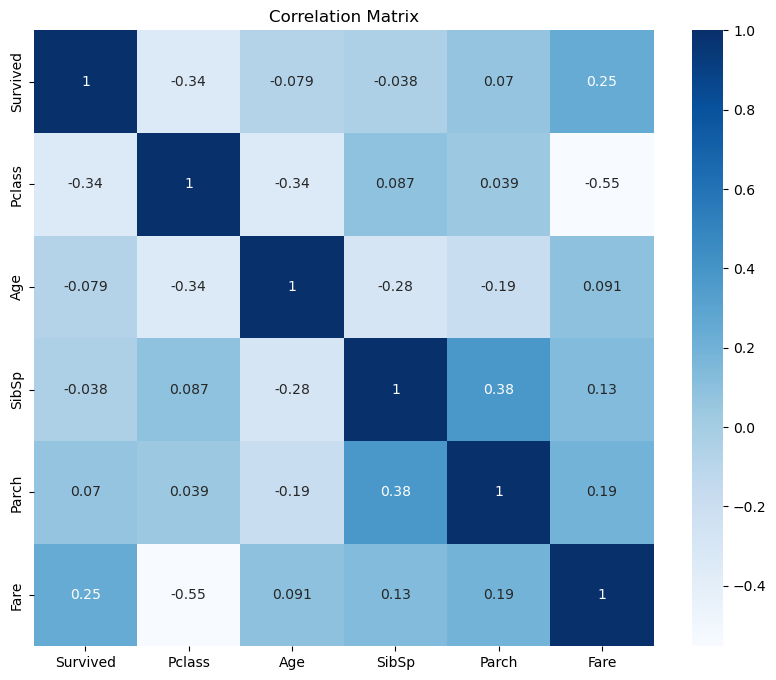

In [158]:
plt.figure(figsize= (10,8))
sns.heatmap(corr1, cmap = 'Blues', annot = True)
plt.title("Correlation Matrix")
plt.show()

Since all the features in the numerical data are not correlated with each other so there is no multicollinearity in the numerical data as well

In [159]:
df = pd.concat([numerical_data,categorical_data], axis =1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,3,22.000000,1,0,7.2500,0,0
1,1,1,38.000000,1,0,71.2833,1,1
2,1,3,26.000000,0,0,7.9250,1,0
3,1,1,35.000000,1,0,53.1000,1,0
4,0,3,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
885,0,3,39.000000,0,5,29.1250,1,2
887,1,1,19.000000,0,0,30.0000,1,0
888,0,3,29.699118,1,2,23.4500,1,0
889,1,1,26.000000,0,0,30.0000,0,1


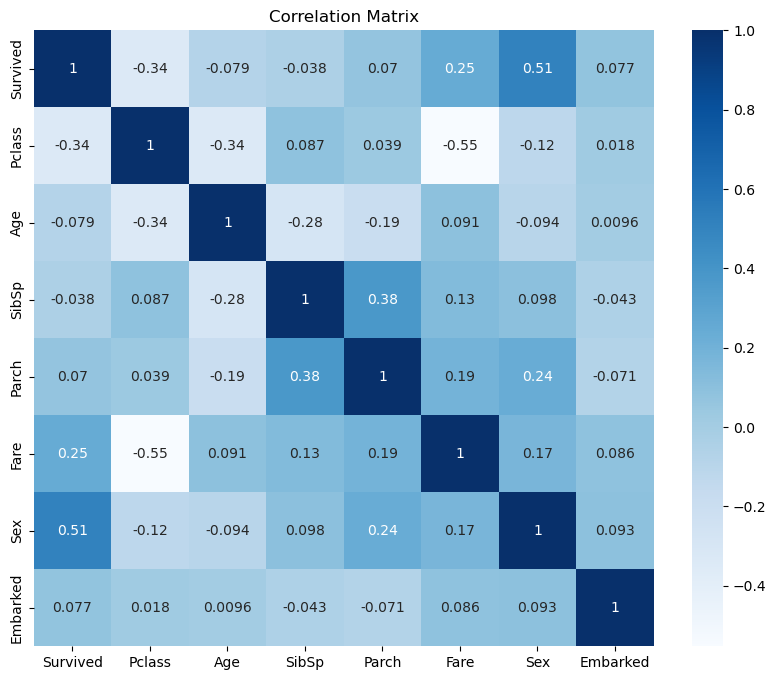

In [160]:
corr1 = df.corr()
plt.figure(figsize= (10,8))
sns.heatmap(corr1, cmap = 'Blues', annot = True)
plt.title("Correlation Matrix")
plt.show()

Since none of the features is correlated with each other as clear from the above plot so the dataset is free from multicollinearity

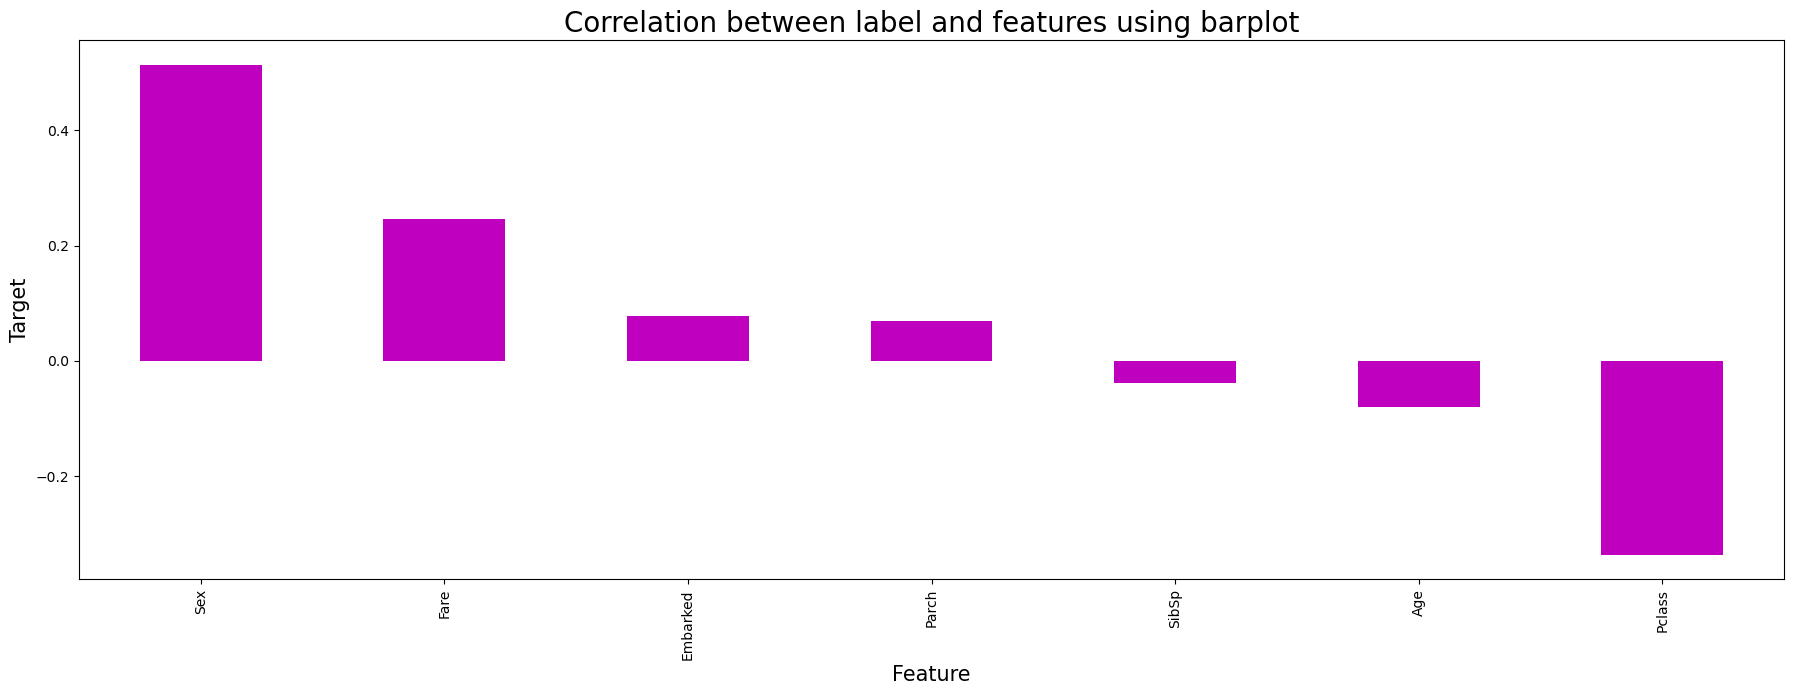

In [161]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind="bar",color="m")
plt.xlabel("Feature",fontsize=15)
plt.ylabel("Target",fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

From the above plot we can see positive and negative correlated features with the target where sex is positively correlated with the target and Pclass is negatively correlated with the target

In [162]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [163]:
y.value_counts()

0    458
1    322
Name: Survived, dtype: int64

In [164]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

In [165]:
y.value_counts()

0    458
1    458
Name: Survived, dtype: int64

I have used oversampling method to make sure that the values in the target variable remains the same so that our system doesnot get biased with certain features

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x 

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0.946511,-0.560688,0.546401,-0.489727,-0.559962,-0.797317,-0.535623
1,-1.362422,0.622495,0.546401,-0.489727,0.678460,1.254206,1.162062
2,0.946511,-0.264892,-0.523050,-0.489727,-0.546907,1.254206,-0.535623
3,-1.362422,0.400648,0.546401,-0.489727,0.326790,1.254206,-0.535623
4,0.946511,0.400648,-0.523050,-0.489727,-0.544490,-0.797317,-0.535623
...,...,...,...,...,...,...,...
911,0.946511,0.008654,-0.523050,-0.489727,-0.550054,1.254206,2.859747
912,0.946511,-0.020978,-0.523050,-0.489727,-0.545683,-0.797317,-0.535623
913,-0.207955,0.089152,0.546401,-0.489727,-0.193010,1.254206,-0.535623
914,-1.362422,1.095142,0.546401,-0.489727,0.316234,-0.797317,-0.535623


In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.742429,Pclass
1,1.234840,Age
2,1.236874,SibSp
3,1.271482,Parch
4,1.621990,Fare
5,1.104681,Sex
6,1.043075,Embarked


From the above it is confirmed that the dataset is free from multicollinearity

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [169]:
maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state ",maxRS)

Best Accuracy is  0.8436363636363636 on Random_state  138


In [170]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30,random_state=maxRS)

In [171]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8145454545454546
Confusion Matrix:  [[117  32]
 [ 19 107]]
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.79      0.82       149
           1       0.77      0.85      0.81       126

    accuracy                           0.81       275
   macro avg       0.82      0.82      0.81       275
weighted avg       0.82      0.81      0.81       275



In [172]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.7927272727272727
Confusion Matrix:  [[118  31]
 [ 26 100]]
Classification Report:                precision    recall  f1-score   support

           0       0.82      0.79      0.81       149
           1       0.76      0.79      0.78       126

    accuracy                           0.79       275
   macro avg       0.79      0.79      0.79       275
weighted avg       0.79      0.79      0.79       275



In [173]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8327272727272728
Confusion Matrix:  [[119  30]
 [ 16 110]]
Classification Report:                precision    recall  f1-score   support

           0       0.88      0.80      0.84       149
           1       0.79      0.87      0.83       126

    accuracy                           0.83       275
   macro avg       0.83      0.84      0.83       275
weighted avg       0.84      0.83      0.83       275



In [174]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.84
Confusion Matrix:  [[125  24]
 [ 20 106]]
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.84      0.85       149
           1       0.82      0.84      0.83       126

    accuracy                           0.84       275
   macro avg       0.84      0.84      0.84       275
weighted avg       0.84      0.84      0.84       275



In [175]:
ADA=AdaBoostClassifier()
ADA.fit(x_train,y_train)
y_pred = ADA.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8036363636363636
Confusion Matrix:  [[115  34]
 [ 20 106]]
Classification Report:                precision    recall  f1-score   support

           0       0.85      0.77      0.81       149
           1       0.76      0.84      0.80       126

    accuracy                           0.80       275
   macro avg       0.80      0.81      0.80       275
weighted avg       0.81      0.80      0.80       275



In [176]:
BG=BaggingClassifier()
BG.fit(x_train,y_train)
y_pred = BG.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8072727272727273
Confusion Matrix:  [[121  28]
 [ 25 101]]
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.81      0.82       149
           1       0.78      0.80      0.79       126

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275



In [177]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred = DTC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8
Confusion Matrix:  [[119  30]
 [ 25 101]]
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.80      0.81       149
           1       0.77      0.80      0.79       126

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275



In [178]:
score=cross_val_score(RFC,x,y,cv=5)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score.mean()))

[0.69565217 0.80874317 0.72677596 0.81967213 0.78142077]
0.7664528391541934
Difference between accuracy score and cross validation score is:  0.03354716084580667


In [179]:
score1=cross_val_score(LR,x,y)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score1.mean()))

[0.74456522 0.7704918  0.75409836 0.77595628 0.71038251]
0.7510988358279876
Difference between accuracy score and cross validation score is:  0.0489011641720124


In [180]:
score2=cross_val_score(svm,x,y)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score2.mean()))

[0.76086957 0.79781421 0.74863388 0.78688525 0.68306011]
0.7554526015680685
Difference between accuracy score and cross validation score is:  0.04454739843193156


In [181]:
score3=cross_val_score(GBC,x,y)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score3.mean()))

[0.77173913 0.81967213 0.75409836 0.81967213 0.71584699]
0.7762057495842243
Difference between accuracy score and cross validation score is:  0.023794250415775764


In [182]:
score4=cross_val_score(ADA,x,y)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score4.mean()))

[0.71195652 0.80327869 0.75956284 0.79234973 0.70491803]
0.7544131622713234
Difference between accuracy score and cross validation score is:  0.045586837728676666


In [183]:
score5=cross_val_score(BG,x,y)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score5.mean()))

[0.69565217 0.7704918  0.74863388 0.81420765 0.76502732]
0.7588025659301497
Difference between accuracy score and cross validation score is:  0.041197434069850325


In [184]:
score6=cross_val_score(DTC,x,y)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score6.mean()))

[0.66847826 0.7704918  0.72131148 0.75409836 0.76502732]
0.7358814445236398
Difference between accuracy score and cross validation score is:  0.06411855547636025


Since the Difference between the Accuracy score and cross validation score is minimum for Gradient Boosting Classifier so i select it as the best working model

In [185]:
param={"criterion": ["friedman_mse",  "mae"],
              "loss":["deviance","exponential"],
              "max_features":["log2","sqrt"],
              'learning_rate': [0.01,0.05,0.1,1,0.5],
              'max_depth': [3,4,5],
              'min_samples_leaf': [4,5,6],
              'subsample': [0.6,0.7,0.8],
              'n_estimators': [5,10,15,20]
      }

In [186]:
GSCV=GridSearchCV(GradientBoostingClassifier(),param,cv=8)

In [187]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.05, 0.1, 1, 0.5],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [4, 5, 6],
                         'n_estimators': [5, 10, 15, 20],
                         'subsample': [0.6, 0.7, 0.8]})

In [188]:
GSCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'n_estimators': 15,
 'subsample': 0.7}

In [189]:
final = GradientBoostingClassifier(criterion='friedman_mse',learning_rate= 0.05,loss='exponential',max_depth=5,
max_features='sqrt',min_samples_leaf=6,n_estimators=20,subsample=0.8)
final.fit(x_train,y_train)
pred = final.predict(x_test)
print("Accuracy Score: " , accuracy_score(y_test,pred))

Accuracy Score:  0.8436363636363636


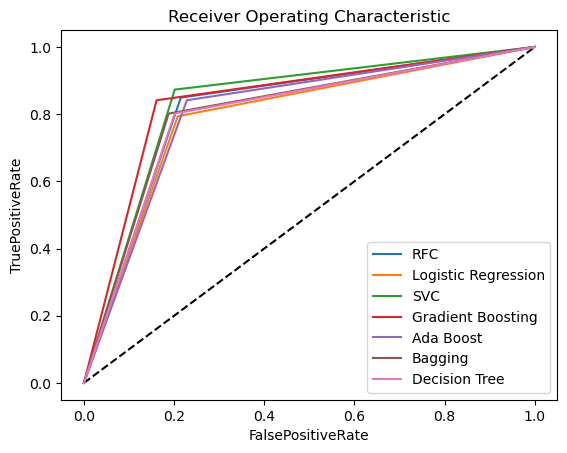

In [196]:
y_pred_prob1 = RFC.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = LR.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = svm.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = GBC.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = ADA.predict(x_test)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)

y_pred_prob6 = BG.predict(x_test)
fpr6 , tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)

y_pred_prob7 = DTC.predict(x_test)
fpr7 , tpr7, thresholds7 = roc_curve(y_test, y_pred_prob7)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "RFC")
plt.plot(fpr2, tpr2, label= "Logistic Regression")
plt.plot(fpr3, tpr3, label= "SVC")
plt.plot(fpr4, tpr4, label= "Gradient Boosting")
plt.plot(fpr5, tpr5, label= "Ada Boost")
plt.plot(fpr6, tpr6, label= "Bagging")
plt.plot(fpr7, tpr7, label= "Decision Tree")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()

In [190]:
import joblib
joblib.dump(final, "Titanic.pkl")

['Titanic.pkl']

In [191]:
model = joblib.load("Titanic.pkl")
prediction=final.predict(x_test)
prediction

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [192]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,1,1
1,0,1
2,1,1
3,0,0
4,0,0
...,...,...
270,0,0
271,1,1
272,1,0
273,0,0


In [193]:
conclusion=pd.DataFrame([final.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
Predicted,1,0,1,0,0,1,1,1,1,0,...,1,0,1,0,0,0,1,1,0,0
Original,1,1,1,0,0,1,1,1,1,0,...,1,0,1,0,0,0,1,0,0,0
